# **EDA & Visualization for the Student Performance Dataset**



## Intuition of Distribution

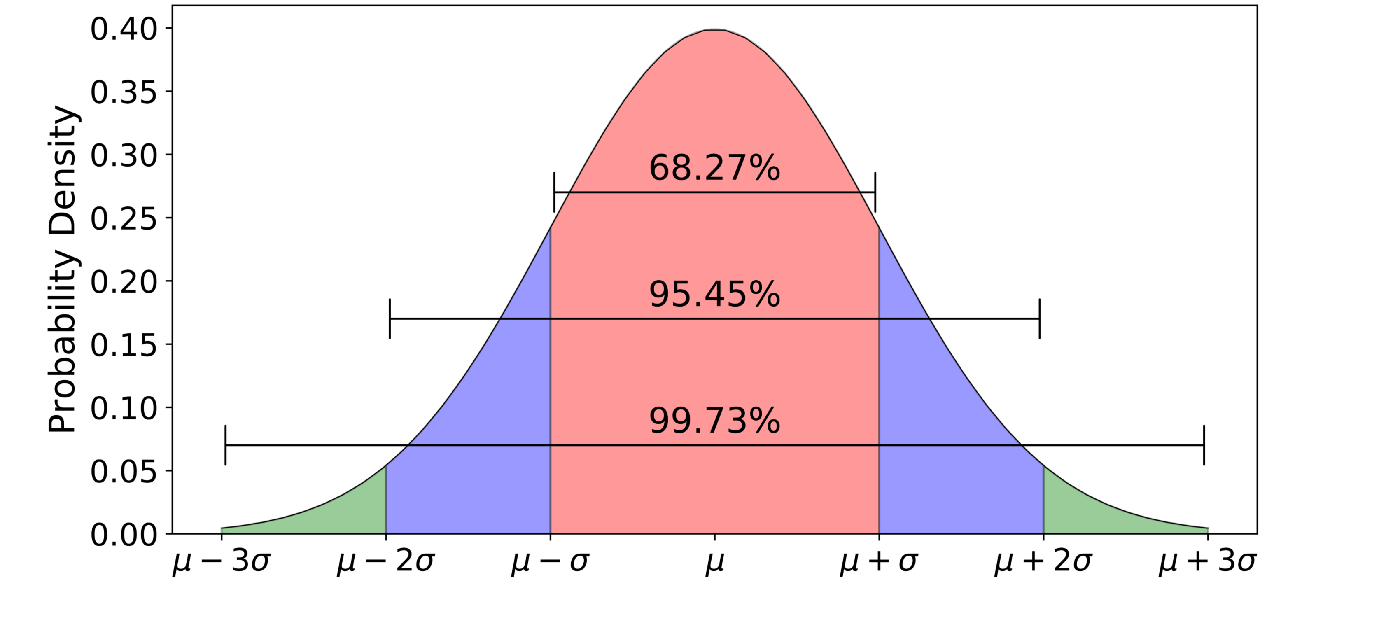

* ## Intuition about Skewed data

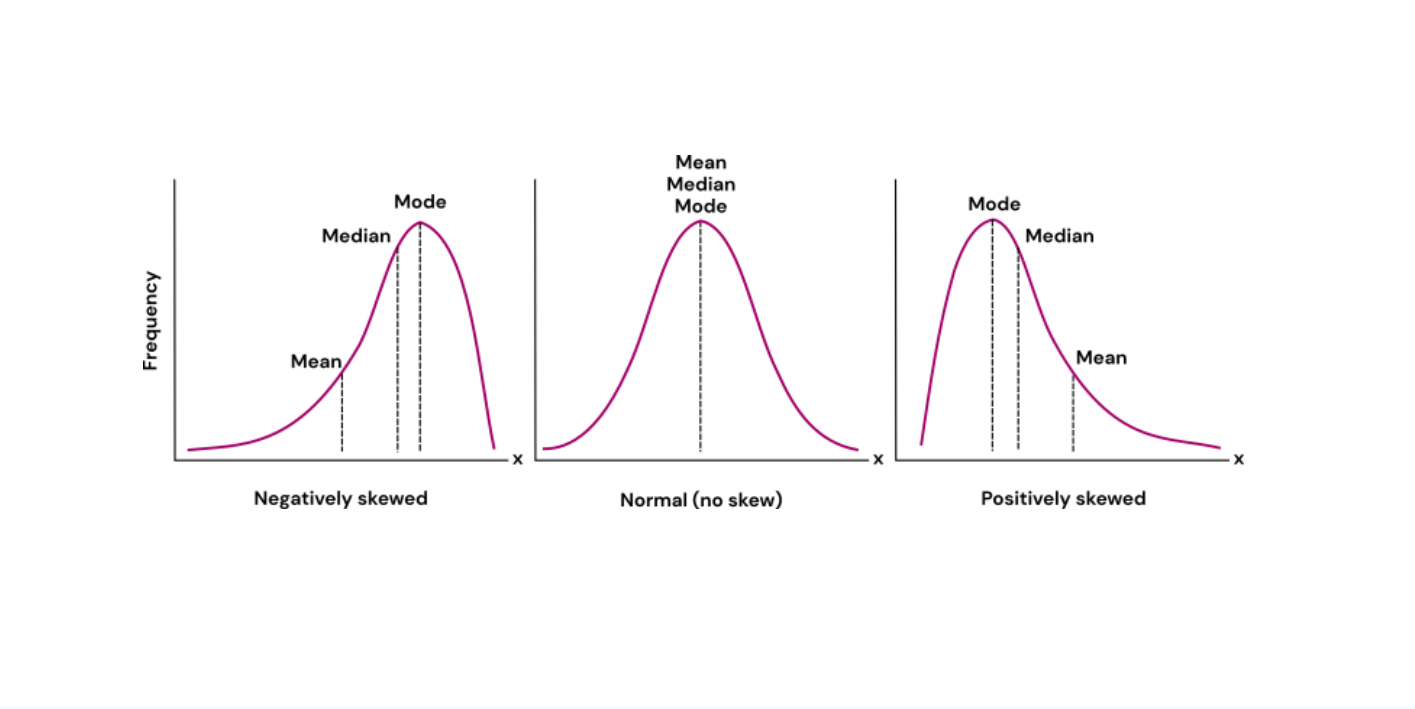

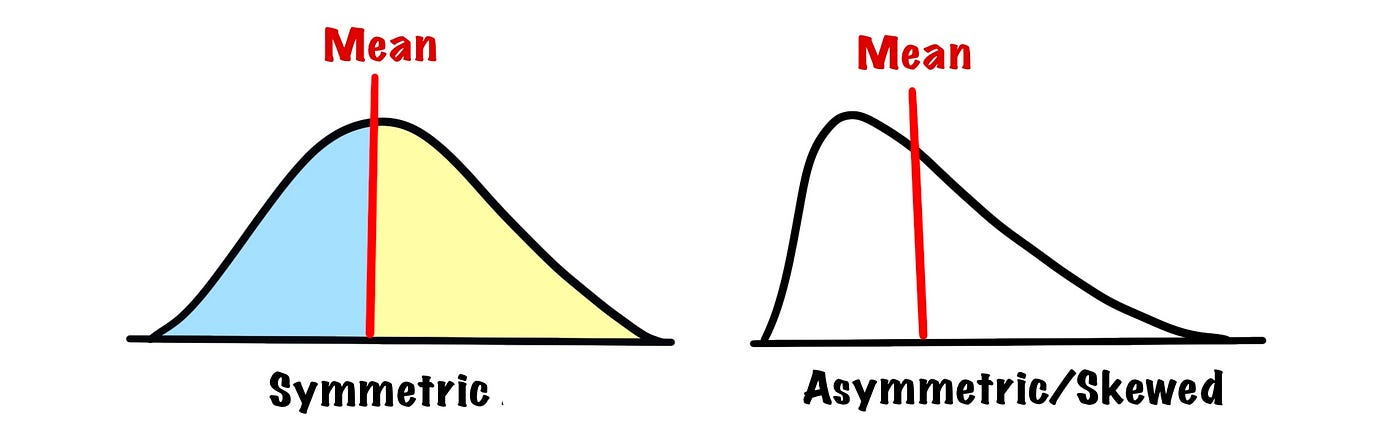

* ## StandardScaler, MinMaxScaler and RobustScaler techniques

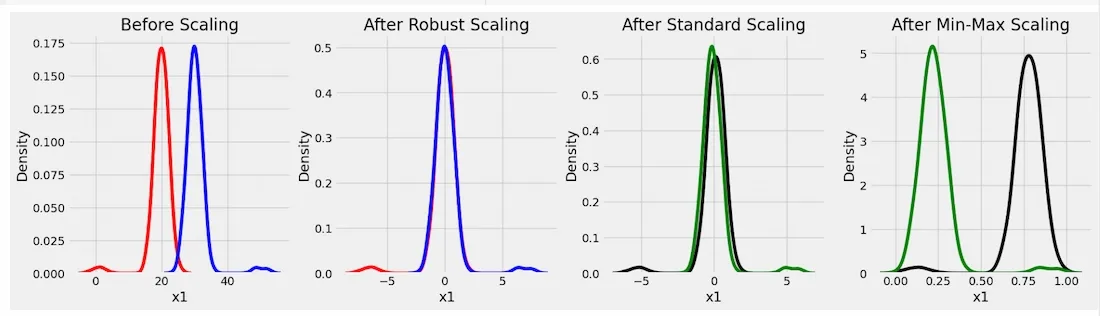

## Feature Scaling Techniques

---

## 1. StandardScaler

### Formula
$$
x_{scaled} = \frac{x - \mu}{\sigma}
$$

### Where
- **x** — original value  
- **μ** — mean of the feature  
- **σ** — standard deviation  

### Advantages
- Centers data around zero
- Scales features to unit variance
- Works well for distance-based and gradient-based models

### Disadvantages
- Sensitive to outliers
- Not suitable for highly non-normal distributions

---

## 2. MinMaxScaler

### Formula
$$
x_{scaled} = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

### Where
- **x** — original value  
- **xₘᵢₙ** — minimum feature value  
- **xₘₐₓ** — maximum feature value  

### Advantages
- Scales data into a fixed range (usually [0, 1])
- Easy to interpret
- Preserves relative distances

### Disadvantages
- Very sensitive to outliers
- Extreme values can compress most data points

---

## 3. RobustScaler

### Formula
$$
x_{scaled} = \frac{x - \text{median}(x)}{Q_3 - Q_1}
$$

### Where
- **median(x)** — 50th percentile (Q₂)
- **Q₁** — first quartile (25%)
- **Q₃** — third quartile (75%)

### Advantages
- Resistant to outliers
- Maintains structure of non-outlier data

### Disadvantages
- Less interpretable than MinMaxScaler
- May perform poorly on highly skewed data


#**Code**

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



## Download latest version


In [ ]:
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")
df = pd.read_csv(f"{path}/Student_performance_data _.csv")
print("Path to dataset files:", path)

##EDA
First Look (Data Understanding) Data overview

In [ ]:
df.info()

In [ ]:
df.describe()
df.StudentID = df['StudentID'] - 1000

In [ ]:
grade_map = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "F"
}

df["GradeLabel"] = df["GradeClass"].map(grade_map)


In [ ]:
sns.countplot(
    x="GradeLabel",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Distribution of Grade Classes")
plt.xlabel("Grade")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
sns.countplot(x = "Age",
              data = df)

In [ ]:
sns.countplot(x = "Ethnicity",
              data = df)

In [ ]:
sns.boxplot(x=df["ParentalEducation"], y=df["GPA"])


In [ ]:
sns.kdeplot(df["ParentalEducation"], fill=True)


## Univariate Analysis (One Variable at a Time)
Histogram with KDE

In [ ]:

sns.histplot(
    df["GPA"],
    bins=30,
    kde=True
)

plt.title("Distribution of GPA")
plt.xlabel("GPA")
plt.ylabel("Number of Students")
plt.show()

In [ ]:
plt.hist(df["GPA"],bins = 30)


Histogram — StudyTimeWeekly

In [ ]:
sns.histplot(
    df["StudyTimeWeekly"],
    bins=20,
    kde=True
)

plt.title("Weekly Study Time Distribution")
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Number of Students")

Histogram — Absences

In [ ]:
sns.histplot(
    df["Absences"],
    bins=30,
    kde=True
)

plt.title("Distribution of Absences")
plt.xlabel("Number of Absences")
plt.ylabel("Number of Students")

Gender Distribution


In [ ]:
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution (0=Male, 1=Female)")
plt.show()


Ethnicity Distribution

In [ ]:
sns.countplot(x="Ethnicity", data=df)
plt.title("Ethnicity Distribution")
plt.show()


In [ ]:
categorical_activities = [
    "Extracurricular",
    "Sports",
    "Music",
    "Volunteering"
]

for col in categorical_activities:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Participation (0=No, 1=Yes)")
    plt.show()


## Boxplot — GPA vs GradeClass
Goal

  * Sanity check the target variable

  * Verify that GradeClass is correctly derived from GPA




In [ ]:
sns.boxplot(
    x="GradeLabel",
    y="GPA",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("GPA Distribution by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("GPA")



Boxplot — StudyTimeWeekly vs GradeClass
Goal

* Observe performance trend

* Understand variability within grades

In [ ]:
sns.boxplot(
    x="GradeLabel",
    y="StudyTimeWeekly",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Weekly Study Time by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("Study Time (hours/week)")


Boxplot — Absences vs GradeClass

In [ ]:
sns.boxplot(
    x="GradeLabel",
    y="Absences",
    data=df,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Absences by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("Number of Absences")
plt.show()


Bar Plot — Tutoring vs GradeClass (Normalized)
Goal

* Compare proportions, not raw counts

* Evaluate intervention impact

In [ ]:
tutoring_dist = (
    df.groupby("Tutoring")["GradeLabel"]
    .value_counts(normalize=True)
    .mul(100)
    .rename("Percentage")
    .reset_index()
)

sns.barplot(
    x="GradeLabel",
    y="Percentage",
    hue="Tutoring",
    data=tutoring_dist,
    order=["A", "B", "C", "D", "F"]
)

plt.title("Grade Distribution by Tutoring Status (%)")
plt.xlabel("Grade Class")
plt.ylabel("Percentage of Students")
plt.show()


## Scatter Plot — StudyTimeWeekly vs GPA
Goal

* Examine relationship strength

* Understand that weak correlation can still matter

In [ ]:
sns.regplot(
    x="StudyTimeWeekly",
    y="GPA",
    data=df,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

plt.title("Study Time vs GPA")
plt.xlabel("Study Time (hours per week)")
plt.ylabel("GPA")
plt.show()


Scatter Plot — Absences vs GPA

In [ ]:
sns.regplot(
    x="Absences",
    y="GPA",
    data=df,
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)

plt.title("Absences vs GPA")
plt.xlabel("Number of Absences")
plt.ylabel("GPA")
plt.show()


Pairplot — Multivariate View

In [ ]:
selected_features = [
    "GPA",
    "StudyTimeWeekly",
    "Absences",
    "ParentalSupport"
]

sns.pairplot(
    df[selected_features + ["GradeLabel"]],
    hue="GradeLabel",
    diag_kind="kde",
    corner=True
)

plt.show()


## Violin Plot — GPA by Gender
Goal

* Compare full distributions, not just averages

* Visualize density and spread

In [ ]:
sns.violinplot(
    x="Gender",
    y="GPA",
    data=df,
    inner="quartile"
)

plt.title("GPA Distribution by Gender (0=Male, 1=Female)")
plt.xlabel("Gender")
plt.ylabel("GPA")
plt.show()


GPA by ParentalEducation

In [ ]:
sns.boxplot(
    x="ParentalEducation",
    y="GPA",
    data=df,
    order=[0, 1, 2, 3, 4]
)

plt.title("GPA by Parental Education Level")
plt.xlabel("Parental Education (0=None → 4=Higher)")
plt.ylabel("GPA")
plt.show()


## Heatmap — Correlation Matrix
Goal

* Quantify linear relationships

* Guide feature selection

* Detect redundancy

In [ ]:
numeric_features = [
    "Age",
    "StudyTimeWeekly",
    "Absences",
    "ParentalSupport",
    "ParentalEducation",
    "GPA"
]

corr_matrix = df[numeric_features].corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True
)

plt.title("Correlation Matrix of Numeric & Ordinal Features")
plt.show()


# PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select numeric features for PCA
numeric_cols = [
    "Age", "StudyTimeWeekly", "Absences", "ParentalSupport", "GPA"
]

X = df[numeric_cols]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["GradeLabel"] = df["GradeLabel"]

# Plot
sns.scatterplot(x="PC1", y="PC2", hue="GradeLabel", data=pca_df, palette="Set2")
plt.title("PCA Projection of Student Features")
plt.show()


##TSNE

In [ ]:
from sklearn.manifold import TSNE

# Use standardized features
tsne = TSNE(n_components=2, random_state=42, learning_rate="auto", init="pca")
X_tsne = tsne.fit_transform(X_scaled)

# Plot
tsne_df = pd.DataFrame(X_tsne, columns=["Dim1", "Dim2"])
tsne_df["GradeLabel"] = df["GradeLabel"]

sns.scatterplot(x="Dim1", y="Dim2", hue="GradeLabel", data=tsne_df, palette="Set2")
plt.title("t-SNE Projection of Student Features")
plt.show()


## Subplots

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

sns.lineplot(x=np.linspace(1, 10), y=np.sin(np.linspace(1, 10)), ax=ax[0])
sns.lineplot(x=np.linspace(1, 10), y=np.tan(np.linspace(1, 10)), ax=ax[1])



[Python Graph Gallery](https://python-graph-gallery.com)